In [18]:
#Installation de pyspark
!pip install pyspark

In [19]:
#On monte le googe colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#On importe les bibliotheques
import seaborn as sns
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import corr
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

In [21]:
spark = SparkSession.builder.appName("CardioPrediction").getOrCreate()


In [22]:
data = spark.read.csv("/content/drive/MyDrive/BigData/CVD.csv", header=True, inferSchema=True)


In [23]:
#On affiche le dataset
data.show()

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|      150.0|      32.66|14.54|            Yes|

In [24]:
df = data


In [25]:

df = df.toPandas()

In [26]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [28]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [29]:
taeget = 'Heart_Disease'

In [30]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

#Analyse exploratoire des données





Nous commençons par examiner la répartition des caractéristiques catégorielles dans les données, pour voir leur distrubution. Étant donné que les variables sont binaires, nous pouvons utiliser des diagrammes en barres.



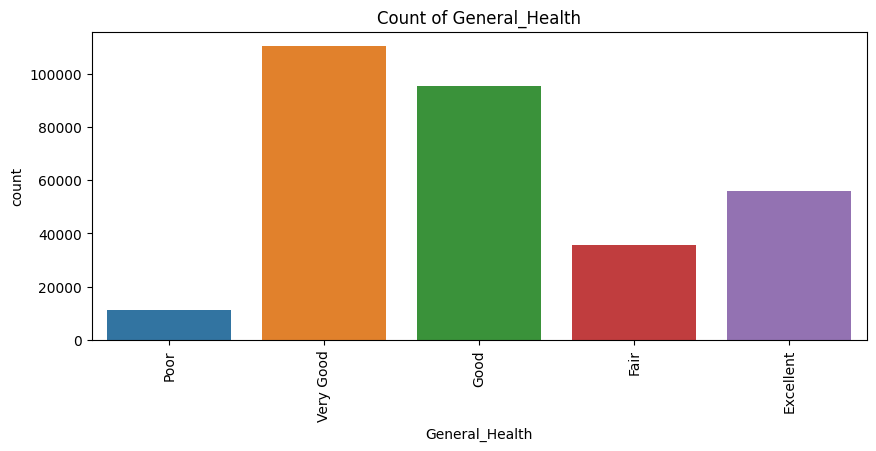

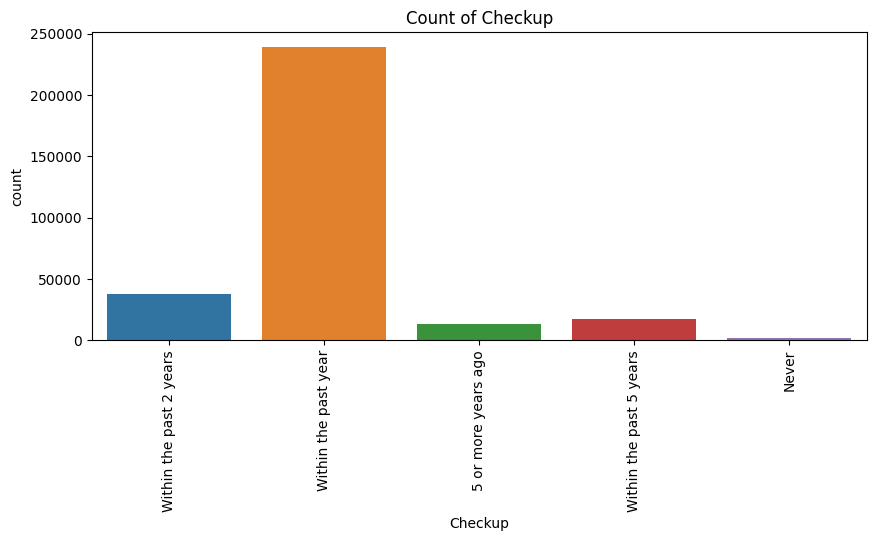

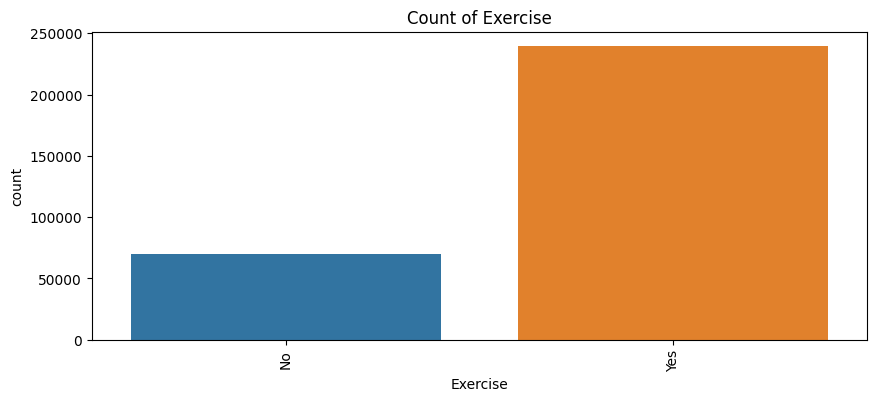

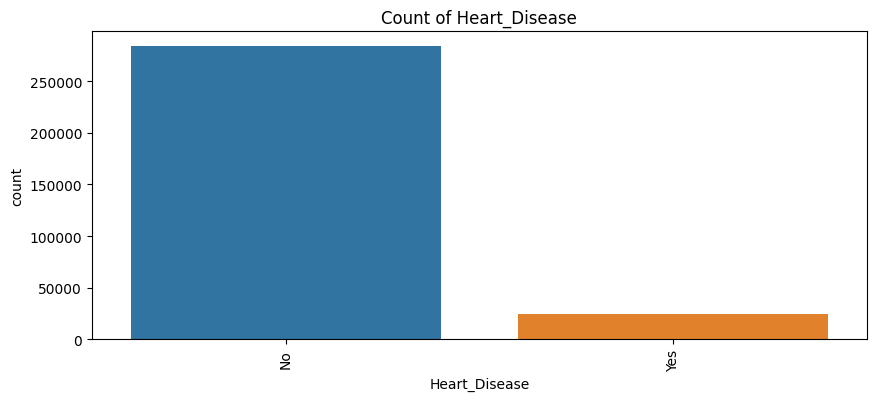

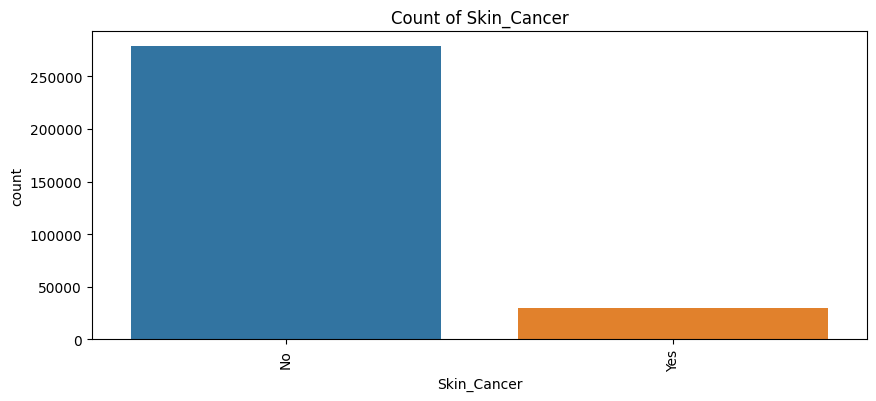

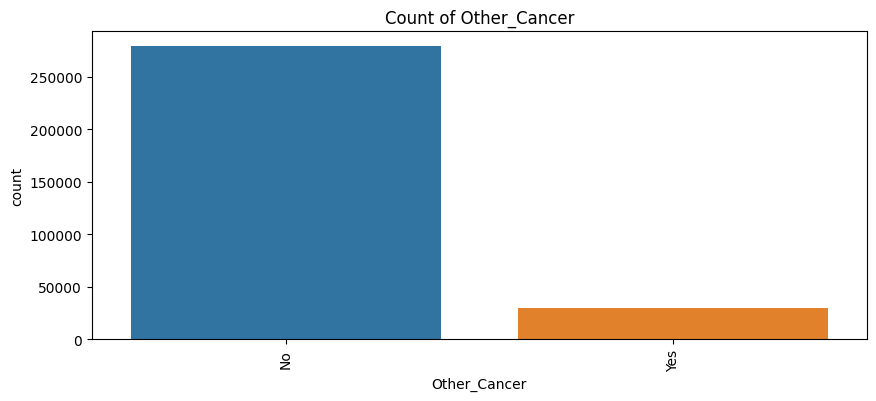

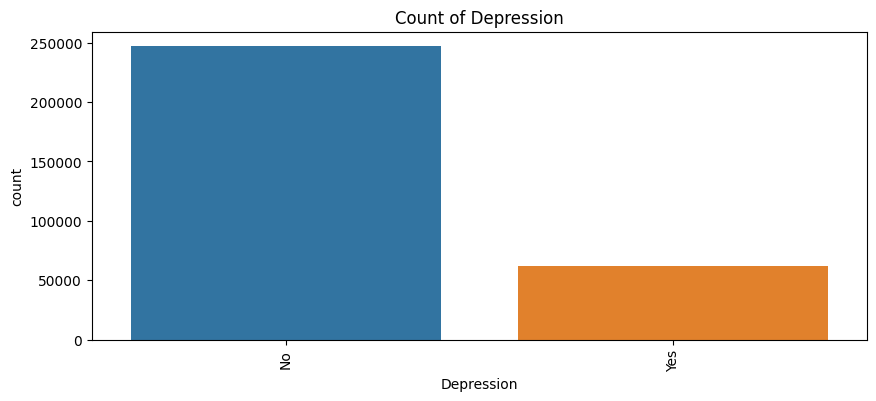

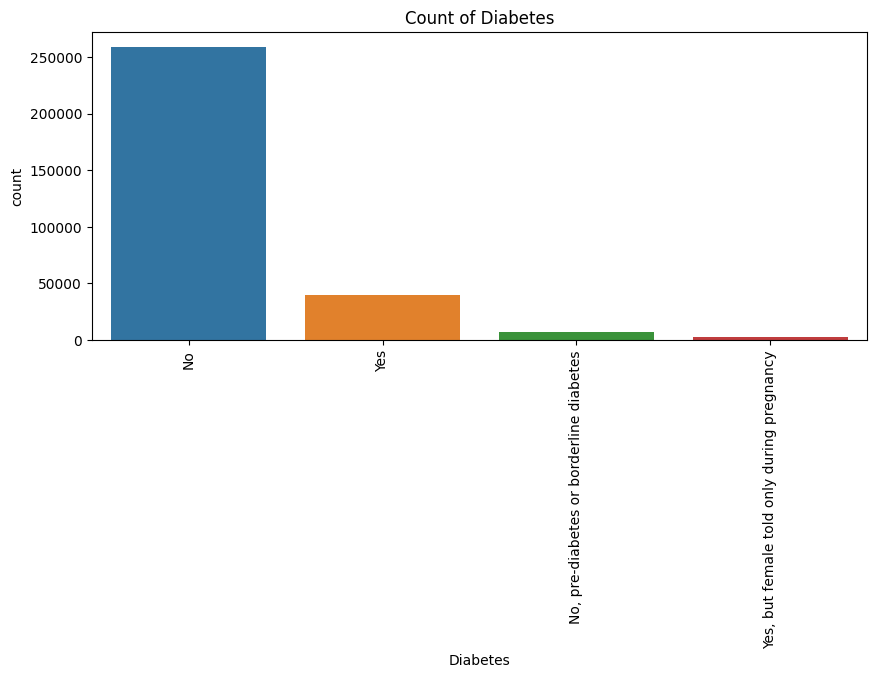

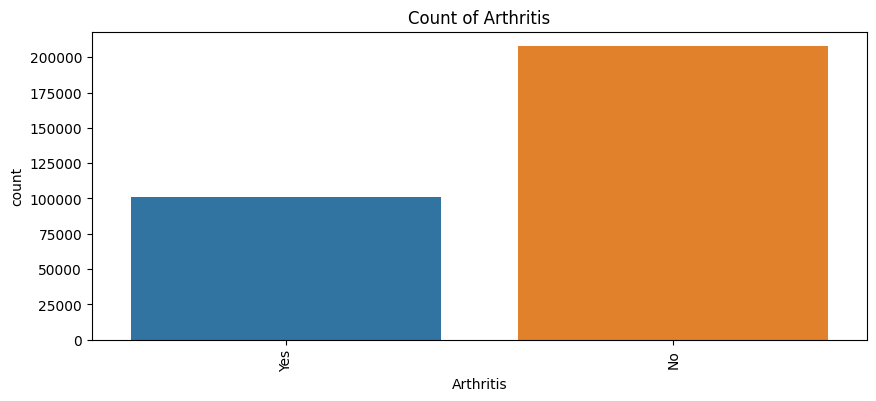

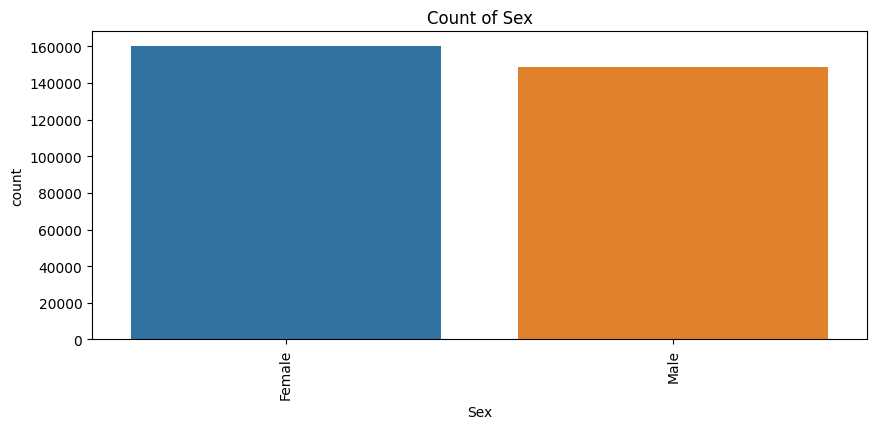

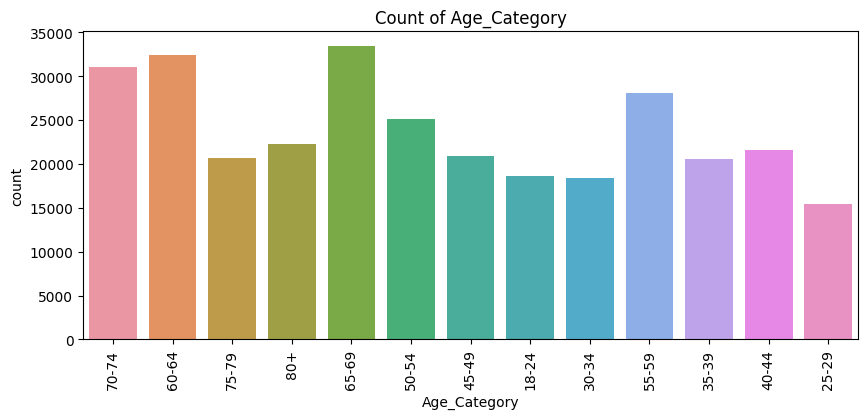

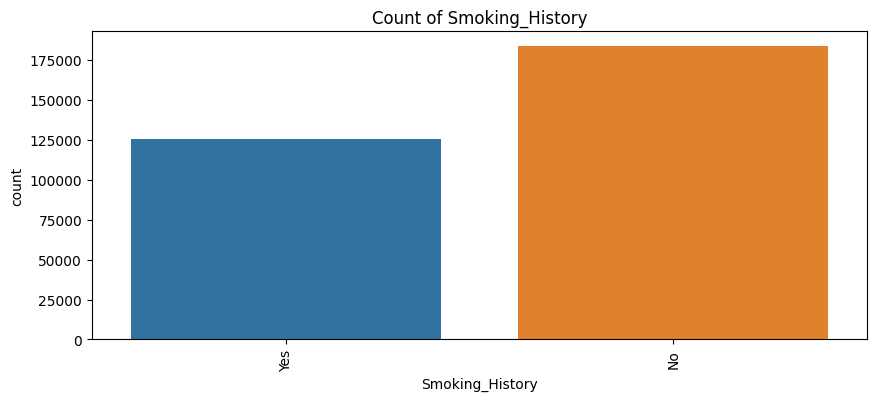

In [31]:
#Vérification de la distribution des caractéristiques catégorielles

categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']


for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

#Interprétation des résultats

Les résultats de notre interprétation révèlent plusieurs informations importantes. En ce qui concerne l'état de santé général, la plupart des patients déclarent leur santé comme "Bon", avec "Très bon" comme deuxième réponse la plus courante, tandis que moins de patients évaluent leur santé comme "Passable" ou "Mauvaise". En ce qui concerne les bilans de santé, la majorité des patients ont effectué un bilan au cours de l'année écoulée, avec moins de patients ayant réalisé leur dernier bilan il y a 2 ans ou plus de 5 ans. Quant à l'exercice, il y a plus de patients déclarant en faire par rapport à ceux qui n'en font pas. En ce qui concerne les maladies, une grande majorité ne souffre pas de maladie cardiaque, de cancer de la peau ou d'autres formes de cancer. De plus, la plupart des patients ne signalent pas de dépression ni de diabète, bien que des proportions significatives déclarent en souffrir. Concernant l'arthrite, la majorité n'est pas touchée, mais un nombre considérable de patients en souffrent. En ce qui concerne le sexe, il y a légèrement plus de patientes que de patients masculins. Les patients de différentes catégories d'âge sont inclus, avec le groupe d'âge 50-54 ans étant le plus représenté, suivi des groupes d'âge 55-59 ans et 60-64 ans. Enfin, la plupart des patients n'ont pas d'antécédents de tabagisme. Ces informations éclairent les tendances et les caractéristiques de notre ensemble de données, offrant des aperçus précieux pour des analyses ultérieures.







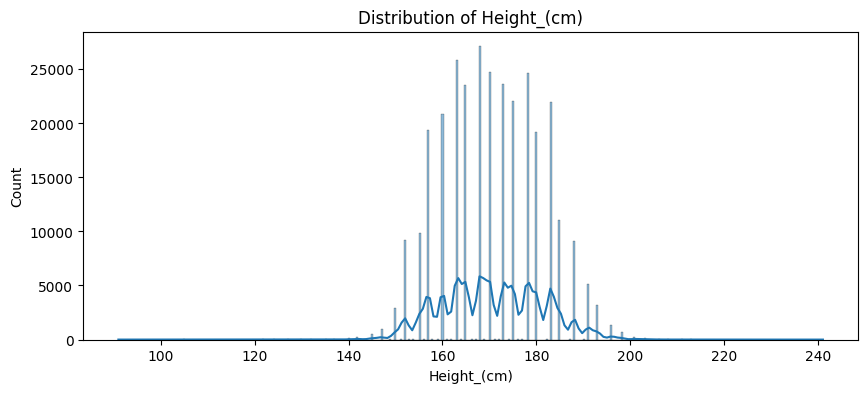

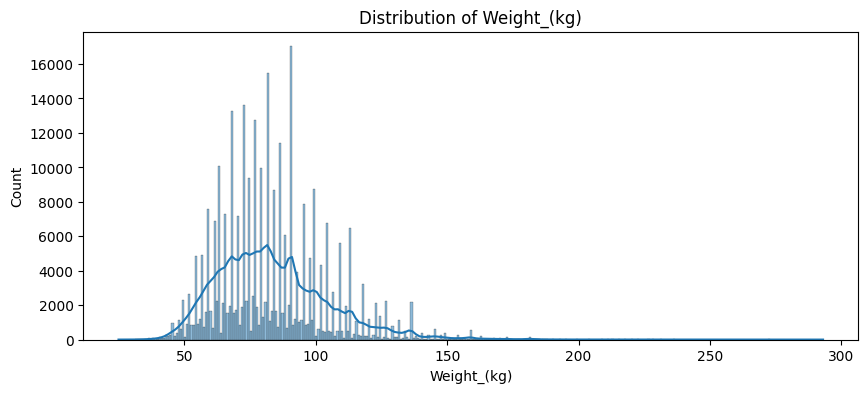

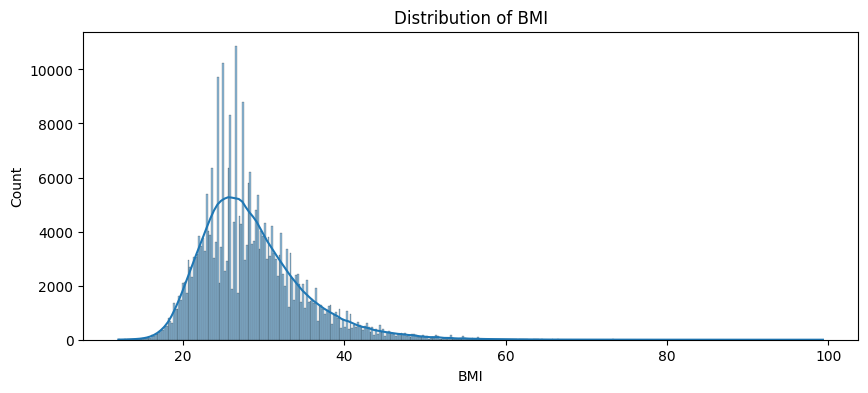

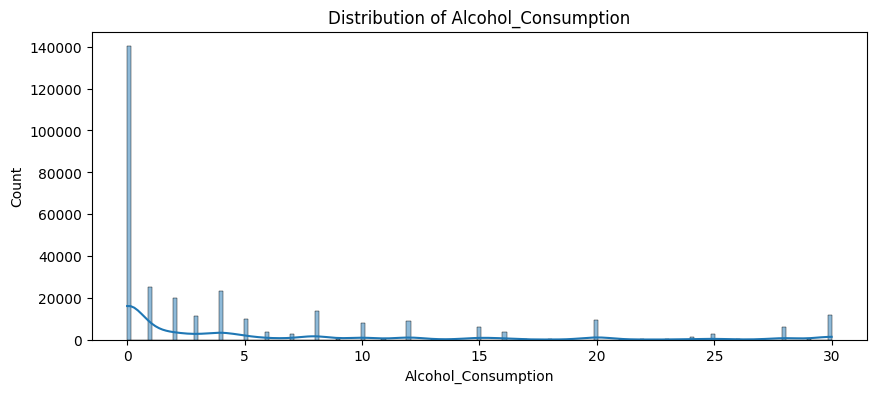

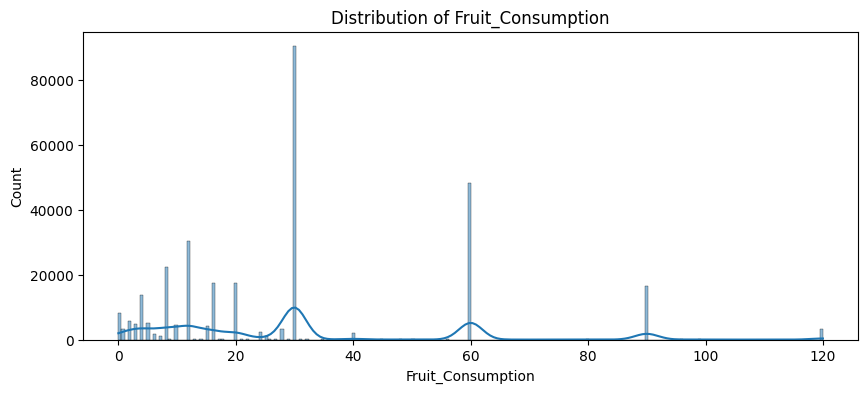

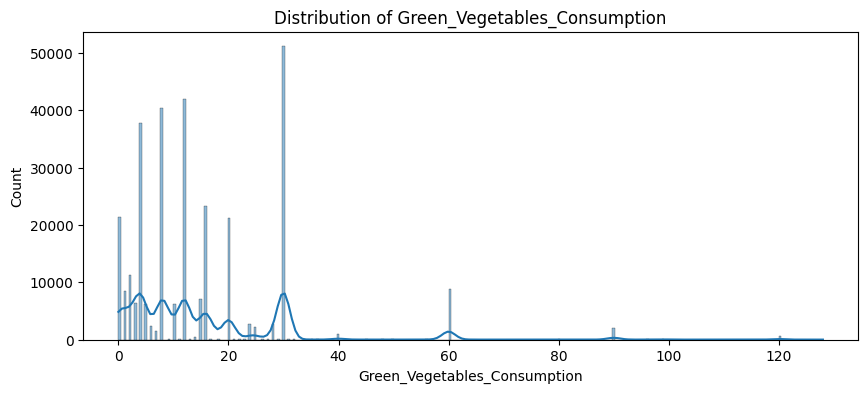

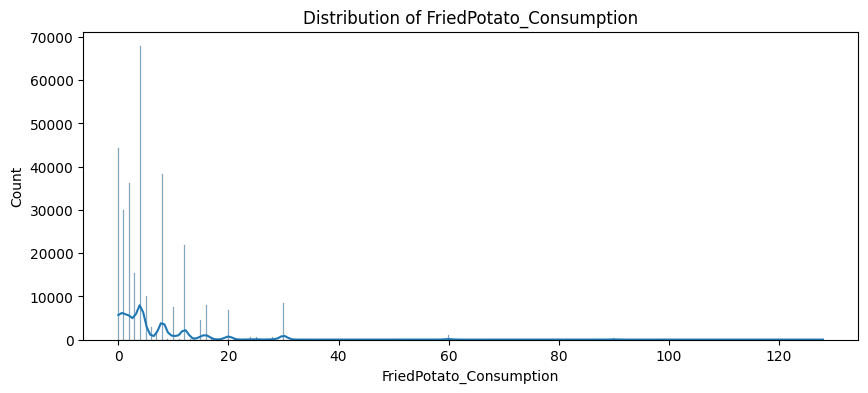

In [32]:

# Nous allons voir la distribution des données numériques
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

#Interprétation
 L'analyse des résultats nous offre des aperçus significatifs. En ce qui concerne la taille des patients (Taille_(cm)), celle-ci suit une distribution normale, avec la majorité des patients ayant des tailles comprises entre environ 160 et 180 cm. De même, le poids des patients (Poids_(kg)) semble également respecter une distribution normale, avec la plupart pesant entre environ 60 et 100 kg. En examinant l'indice de masse corporelle (IMC), on note une légère asymétrie vers la droite. La majorité des patients présentent un IMC entre 20 et 30, indiquant une plage de poids normale à en surpoids, mais il y a aussi une proportion significative avec un IMC dans la plage obèse (>30).

En ce qui concerne les habitudes de consommation, la consommation d'alcool montre une forte asymétrie vers la droite, avec la plupart des patients ayant une faible consommation et quelques-uns ayant une consommation élevée. De même, la consommation de fruits présente une asymétrie similaire, avec une grande partie des patients consommant régulièrement des fruits et d'autres en consommant moins fréquemment. En revanche, la consommation de légumes verts semble être distribuée de manière plus équilibrée, avec la plupart des patients adoptant une consommation modérée. Par ailleurs, la consommation de pommes de terre frites est asymétrique vers la droite, indiquant que la majorité des patients en consomment moins fréquemment, tandis qu'une minorité en consomme plus souvent.







#Analyse bivariée
 Nous allons explorer la relation entre chaque variable et les variables cibles (Maladie_cardiaque, Cancer_de_la_peau, Autres_cancers, Diabète). Cette analyse nous permettra de comprendre comment chaque variable est associée à la présence ou à l'absence de ces maladies. Nous allons utiliser les diagrammes en barres pour visualiser les distributions des variables cibles en fonction de différentes catégories ou niveaux d'autres variables.

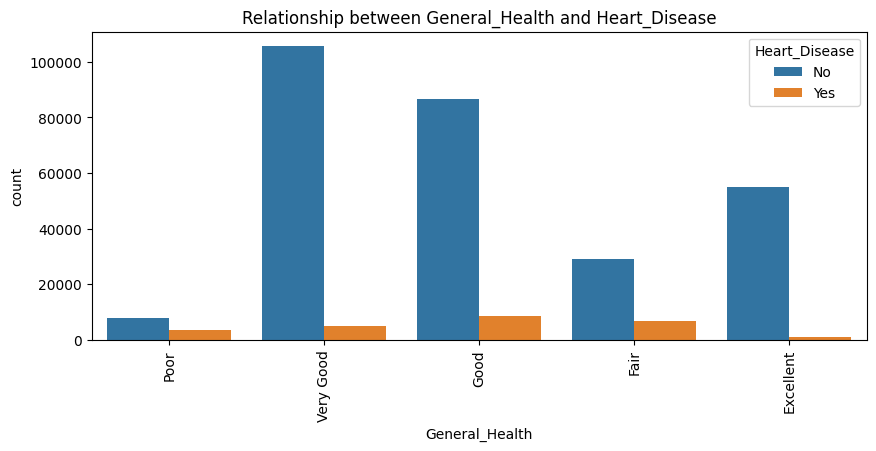

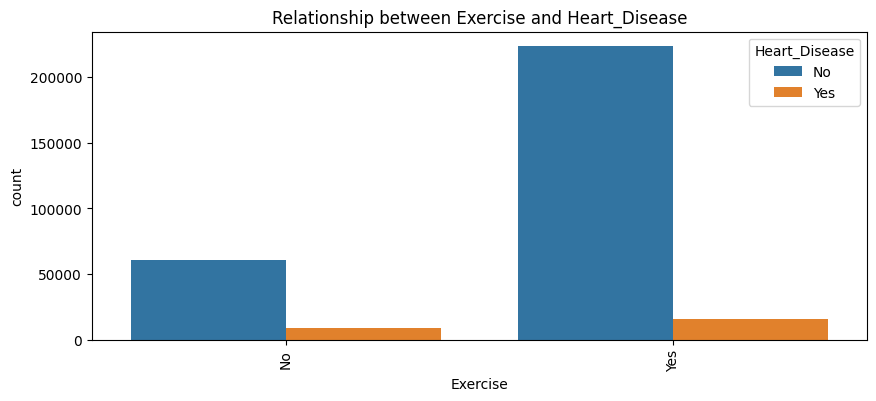

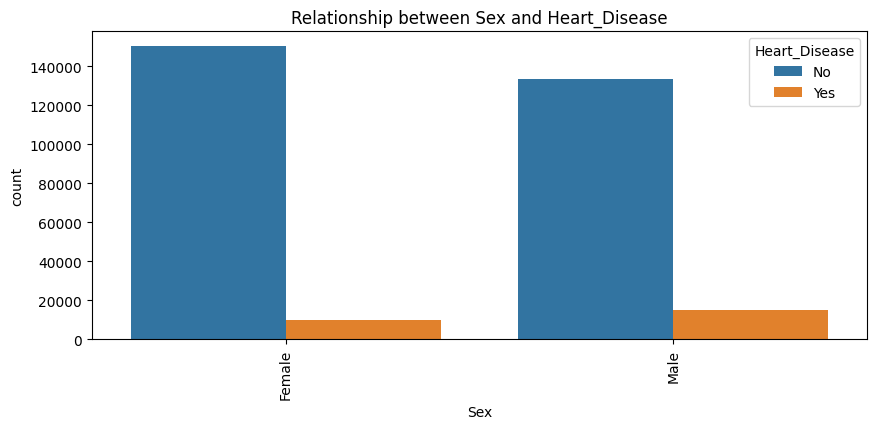

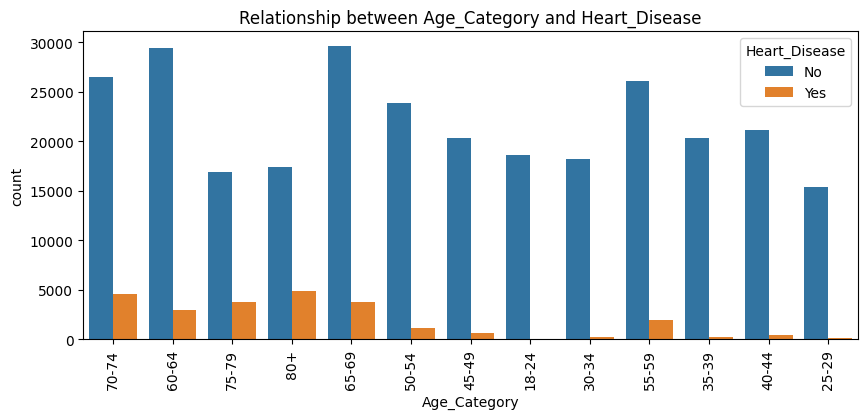

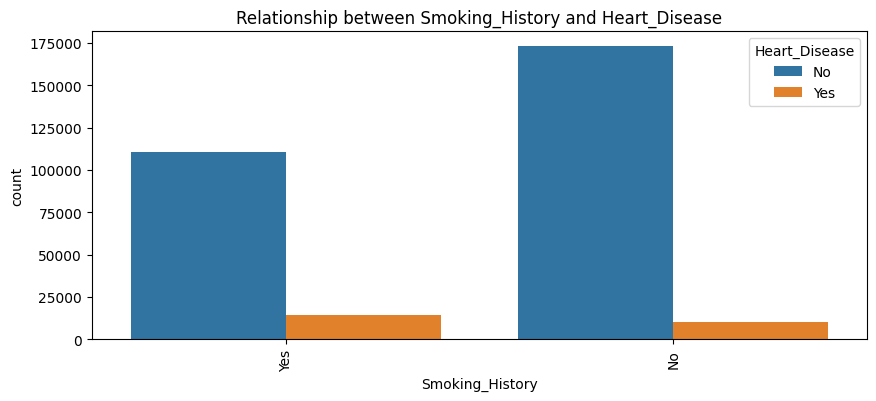

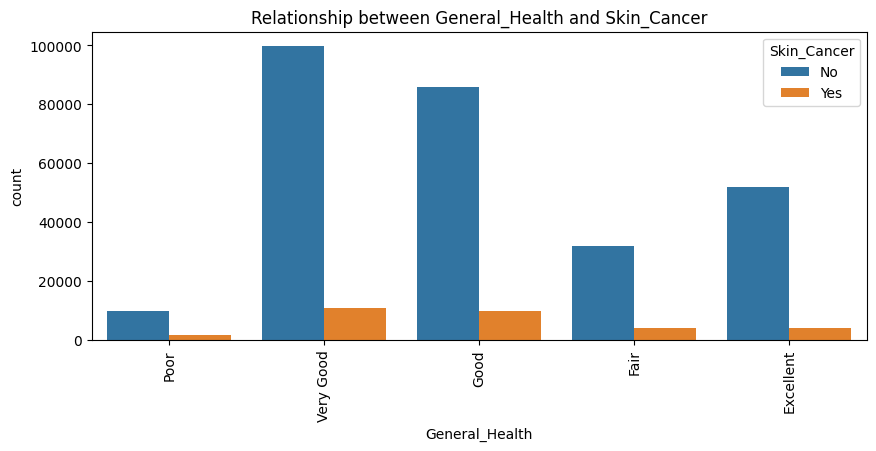

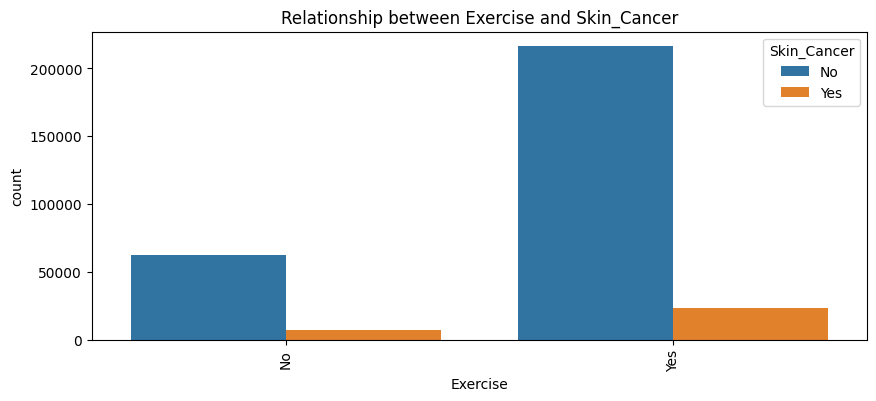

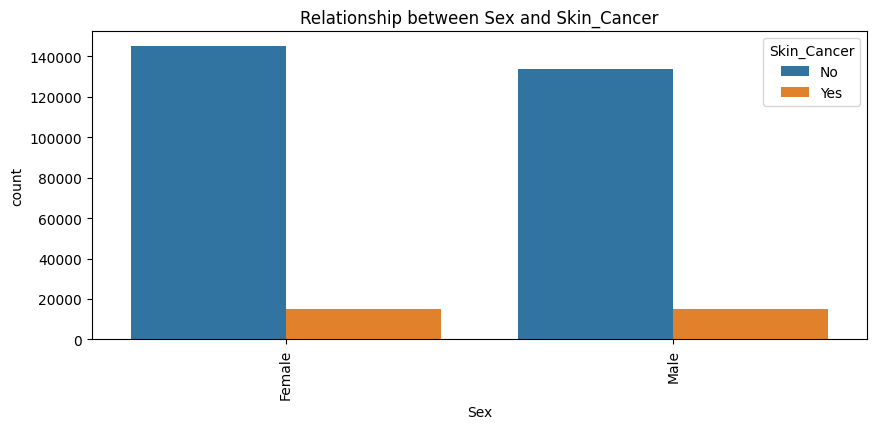

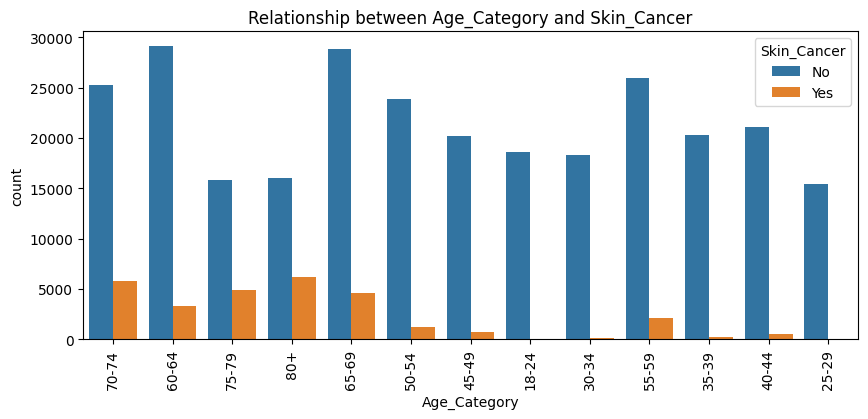

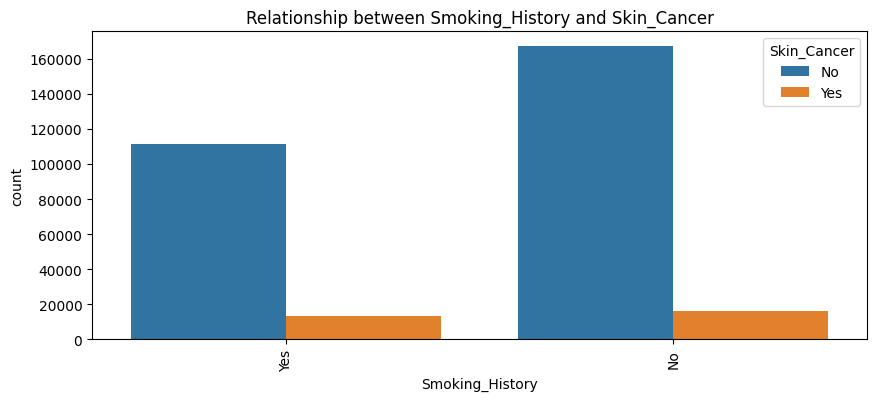

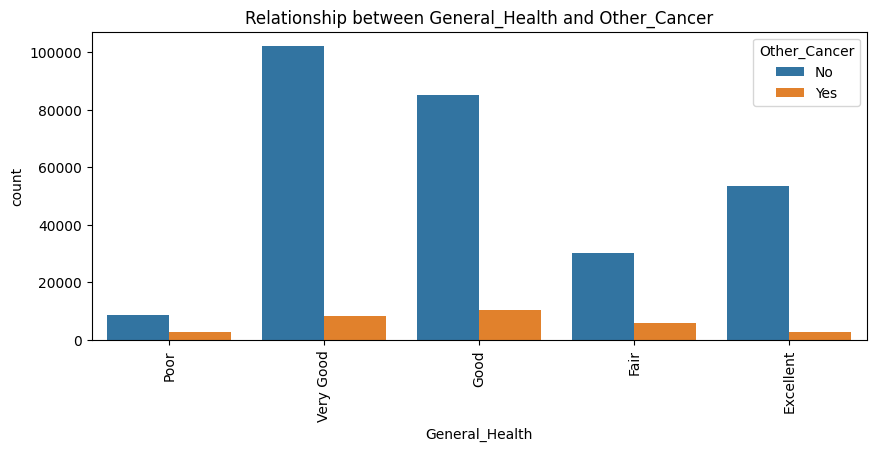

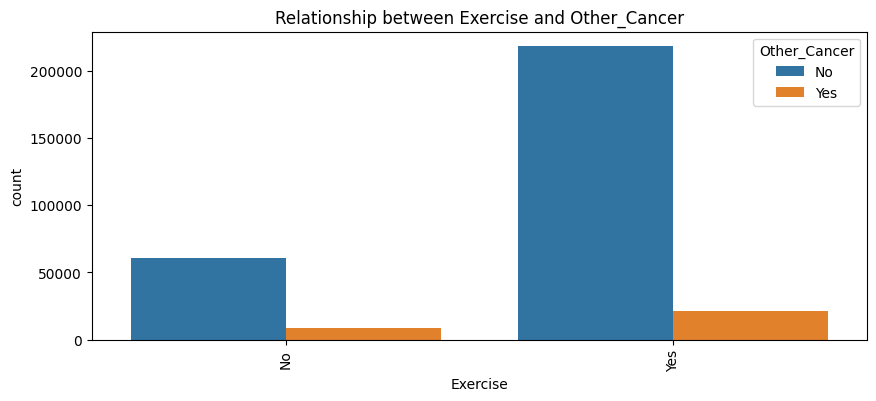

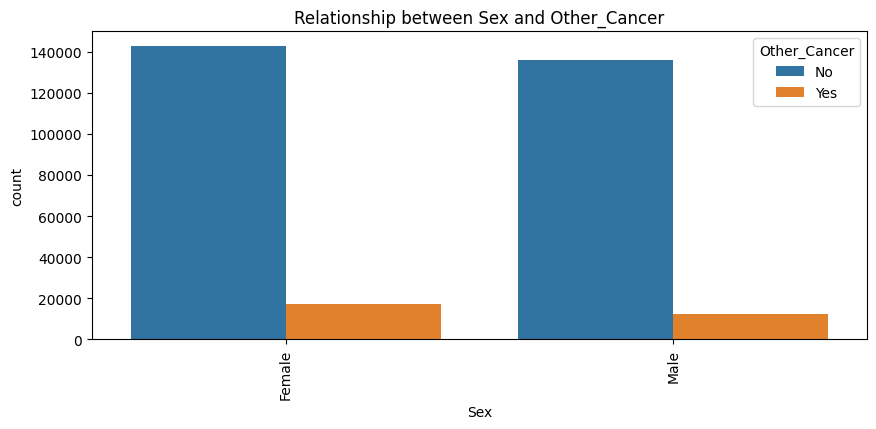

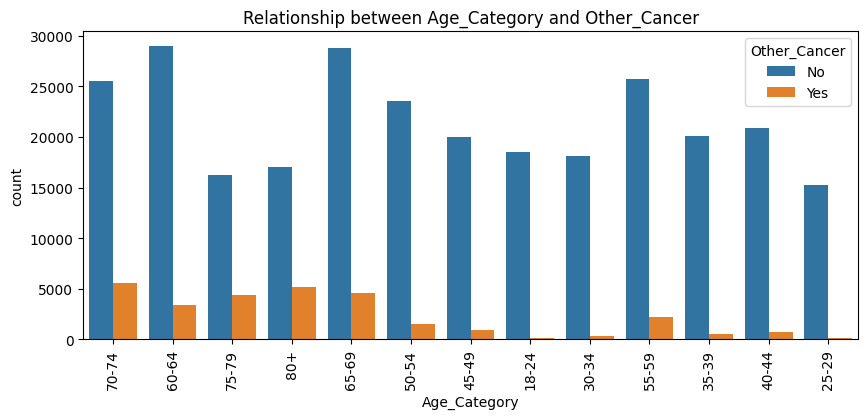

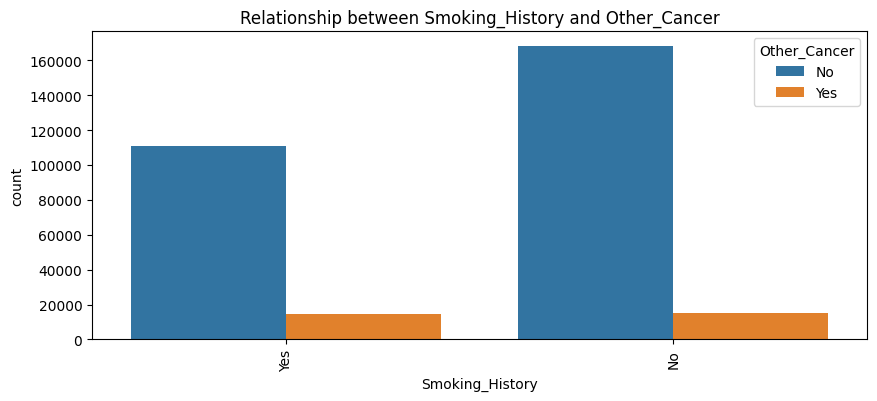

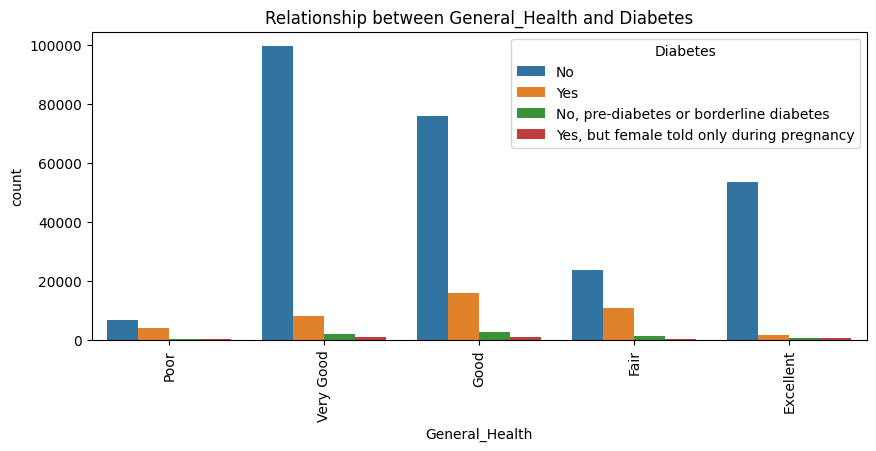

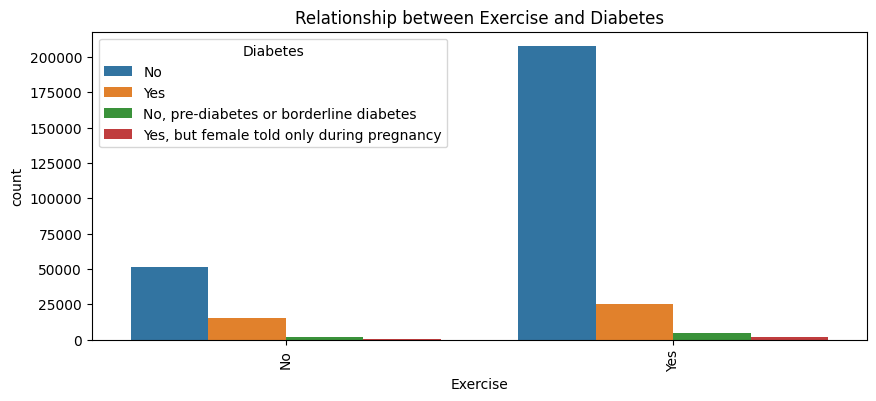

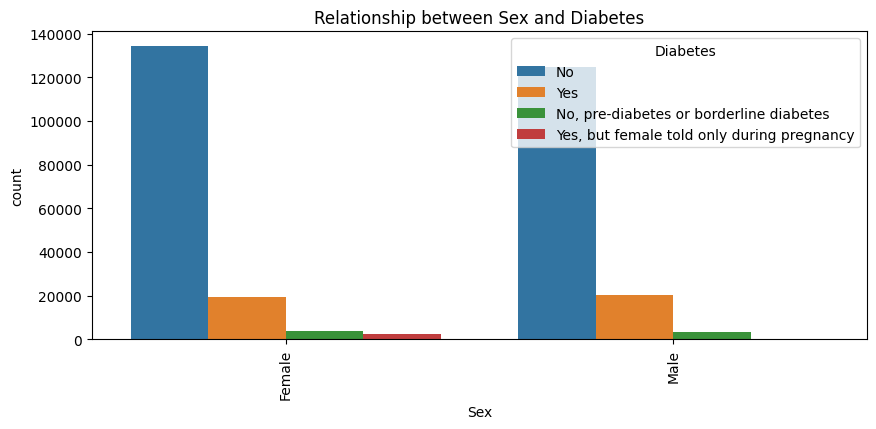

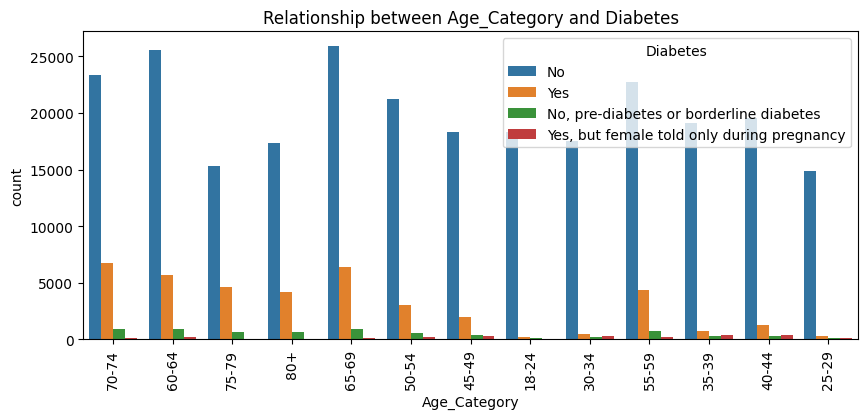

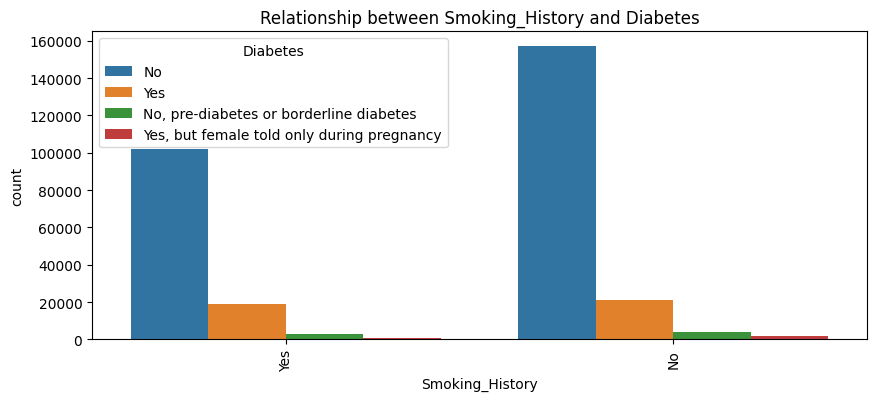

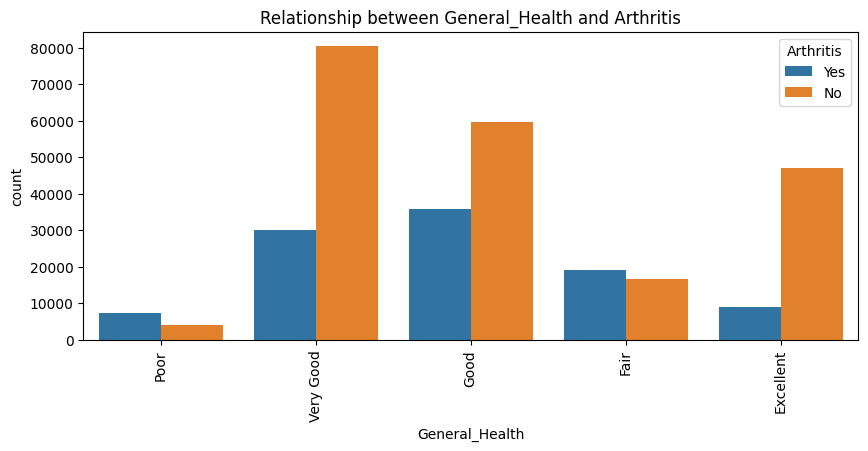

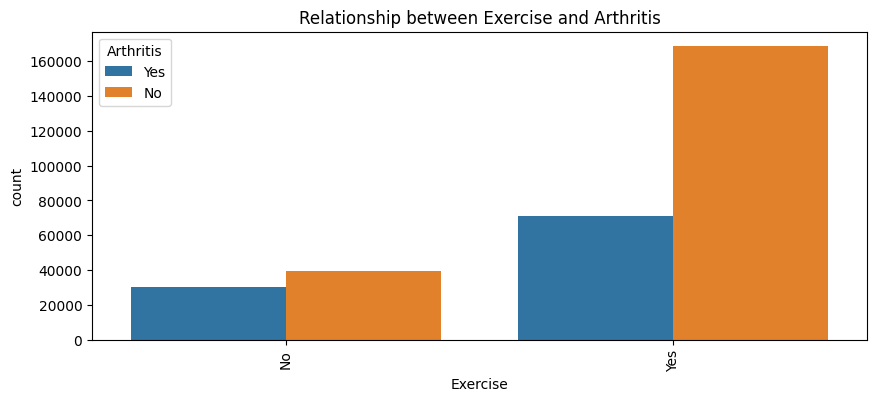

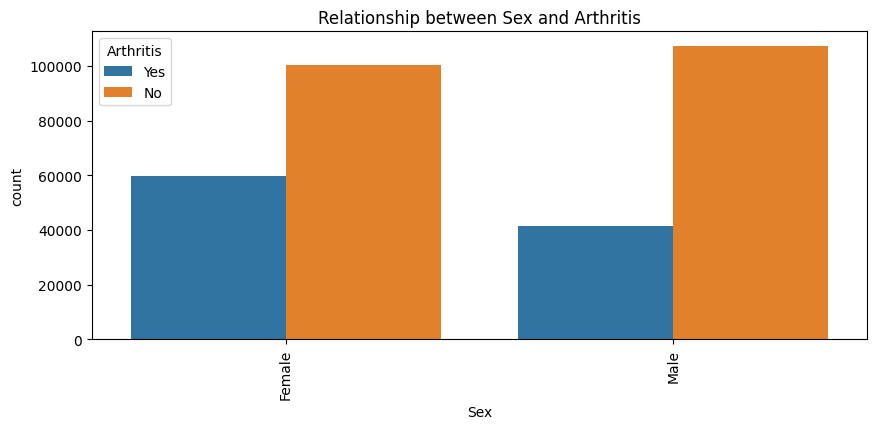

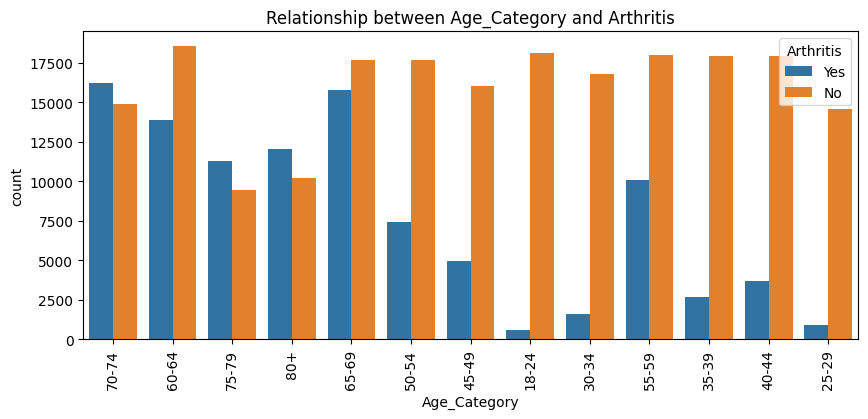

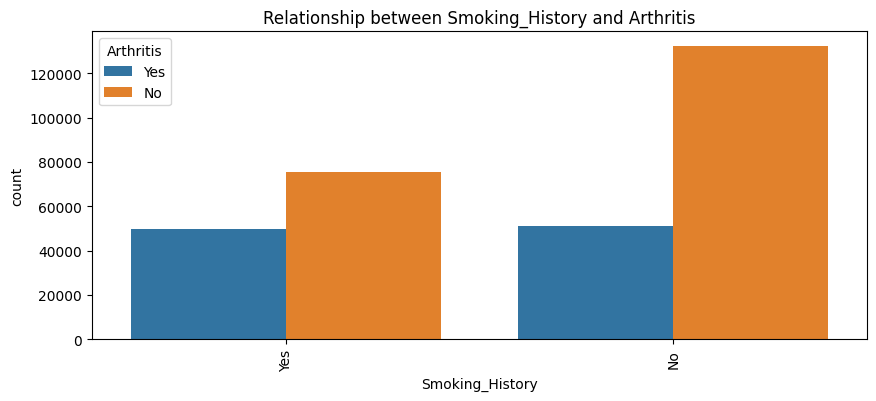

In [33]:

selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()


#Interprétation

 L'interprétation des résultats met en évidence des tendances significatives. En ce qui concerne les maladies cardiaques, il est remarquable qu'elles soient plus fréquentes chez les patients qui évaluent leur état de santé général comme "Mauvais" ou "Passable". De plus, l'absence d'exercice est légèrement associée à une prévalence plus élevée de maladies cardiaques, et les hommes semblent plus susceptibles d'en être atteints que les femmes. En ce qui concerne l'âge, la prévalence des maladies cardiaques augmente avec l'âge, culminant chez les individus de 80 ans et plus. Les antécédents de tabagisme sont également un facteur de risque, car la maladie cardiaque est plus fréquente chez les patients ayant fumé.

Pour ce qui est du cancer de la peau, il est intéressant de noter qu'il est
plus répandu chez les patients qui estiment leur état de santé général comme "Bon" ou "Très bon". Les habitudes d'exercice semblent avoir moins d'impact sur la prévalence de ce cancer. Les femmes sont légèrement plus touchées que les hommes, et la prévalence augmente avec l'âge, atteignant un pic chez les individus âgés de 70 à 74 ans. Les habitudes de tabagisme semblent avoir moins d'impact sur cette prévalence.

En ce qui concerne d'autres types de cancers, une tendance similaire se dessine : une mauvaise perception de l'état de santé général est liée à une prévalence accrue de ces cancers. L'absence d'exercice joue un rôle dans ces cas également, tout comme les antécédents de tabagisme. En ce qui concerne le diabète, il est plus fréquent chez les patients qui évaluent leur santé comme "Passable" ou "Mauvaise", ainsi que chez ceux qui ne pratiquent pas d'exercice. L'âge semble jouer un rôle similaire, avec une prévalence plus élevée chez les individus âgés de 70 à 74 ans. Les antécédents de tabagisme augmentent également le risque de diabète.

Enfin, en ce qui concerne l'arthrite, les tendances sont semblables à celles des autres maladies : une mauvaise évaluation de l'état de santé général et l'absence d'exercice sont associées à une prévalence plus élevée. Les femmes semblent plus touchées que les hommes, et l'âge joue un rôle important, avec une prévalence accrue chez les individus âgés de 75 à 79 ans. La corrélation avec le tabagisme est moins forte, mais demeure présente.



---


---




#Analyse multivariée
 Nous allons étudier les interactions entre différentes variables et comment elles sont collectivement liées aux variables cibles. Cette analyse nous aidera à découvrir des relations complexes et des schémas qui pourraient ne pas être apparents dans les analyses univariées ou bivariées. Nous utiliserons les matrices de corrélation pour obtenir des informations plus approfondies sur les données.

In [34]:
# Re-import the dataset
data = pd.read_csv("/content/drive/MyDrive/BigData/CVD.csv")

# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1,'No': 0})

# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4

}
data['Checkup'] = data['Checkup'].map(checkup_mapping)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)


# Display the first few rows of the cleaned dataset
data.head()


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


In [35]:
 #Remove duplicate rows
data = data.drop_duplicates()

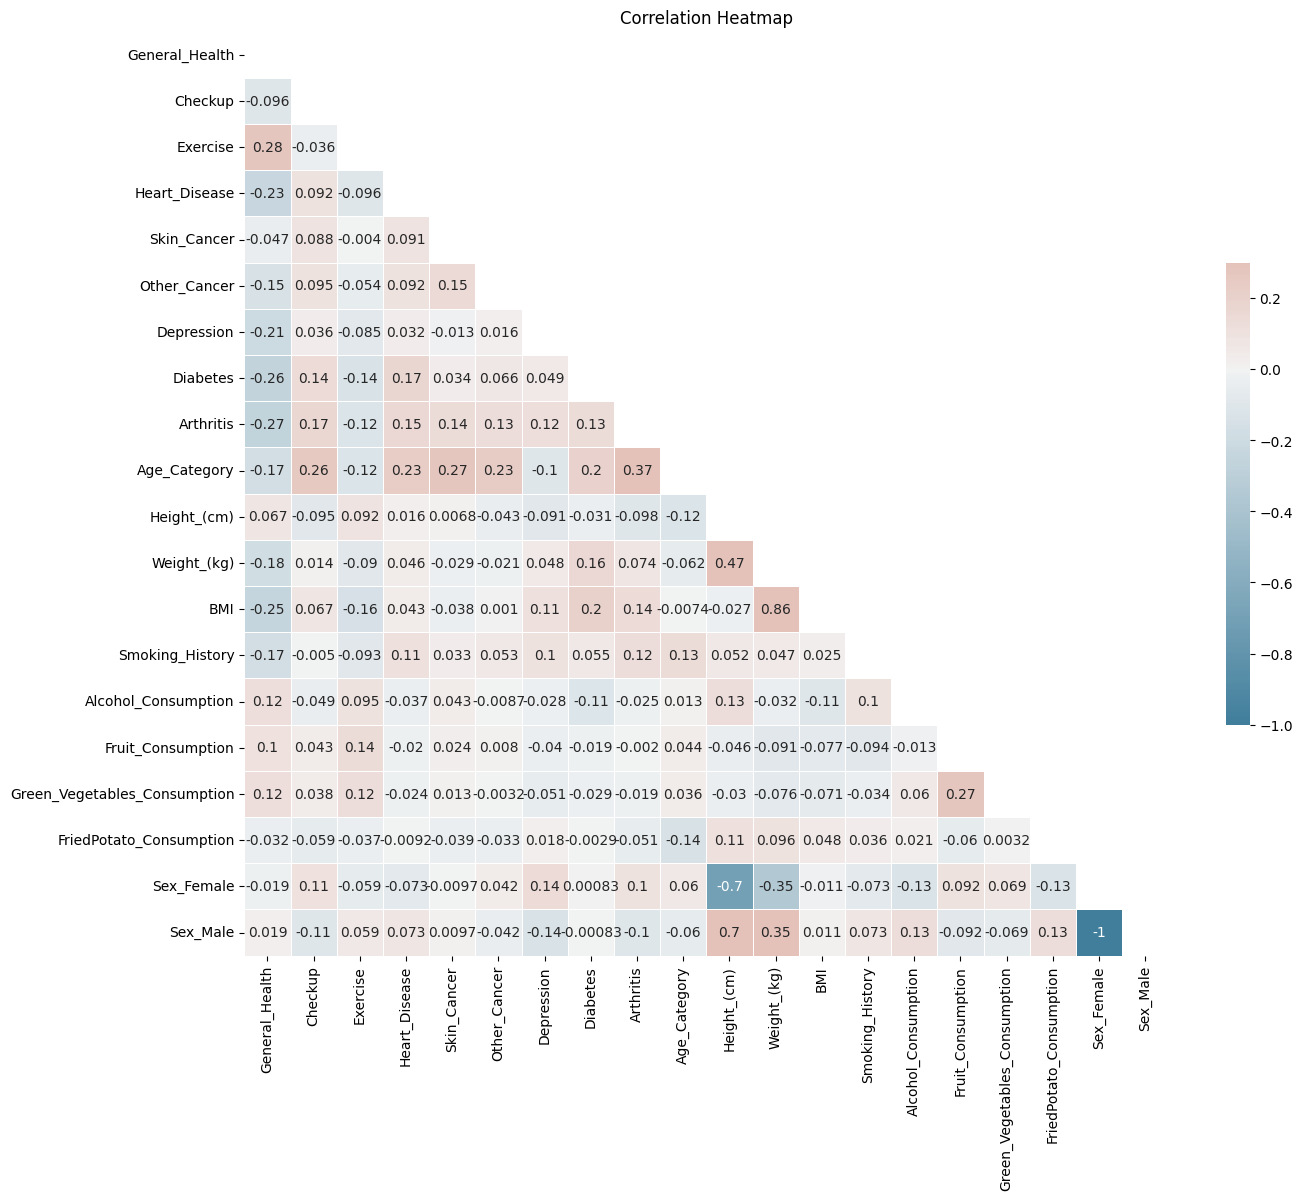

In [36]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

 L'interprétation des résultats à partir de la carte de corrélation fournit des informations clés sur les relations entre les différentes caractéristiques de notre ensemble de données. La carte de chaleur offre une vue visuelle des corrélations, où chaque carré représente la relation entre deux variables. Les valeurs de corrélation, variant de -1 à 1, traduisent le degré d'association entre ces variables. Une valeur proche de 1 indique une forte corrélation positive, une valeur proche de -1 suggère une forte corrélation négative, et une valeur proche de 0 signale une absence de corrélation.

En analysant la carte de corrélation, plusieurs constatations se dégagent :

L'Indice de Masse Corporelle (IMC), le Poids_(kg) et l'Exercice présentent une corrélation positive avec le Diabète. Cela implique que les individus avec un IMC ou un poids élevé, ainsi que ceux qui ne font pas d'exercice, ont davantage de risques de développer le diabète.

L'Évaluation Générale de la Santé présente une corrélation négative avec le Diabète, les Maladies Cardiaques, l'Arthrite et la Dépression. Cela signifie que les personnes qui évaluent leur santé comme mauvaise ont tendance à être plus sujettes à ces conditions.

La Catégorie d'Âge affiche une corrélation positive avec les Maladies Cardiaques, le Cancer de la Peau, d'Autres Cancers, le Diabète et l'Arthrite. Cela suggère que le risque de ces maladies croît avec l'âge.

Le Sexe Masculin présente une corrélation positive avec les Maladies Cardiaques et une corrélation négative avec l'Arthrite et le Cancer de la Peau. Cette observation suggère que les hommes sont plus enclins à avoir des problèmes cardiaques, mais moins susceptibles de souffrir d'arthrite ou de cancer de la peau.

#Conclusion
En résumé, cette étude d'analyse exploratoire des données (EDA) a fourni des aperçus précieux sur les relations entre les caractéristiques des patients et différentes maladies. Les analyses ont mis en évidence des tendances importantes, comme l'augmentation du risque de maladies avec l'âge et les liens entre la santé générale, l'exercice, le tabagisme et certaines conditions. Les résultats ont confirmé des associations bien établies, tout en soulignant que les corrélations ne prouvent pas la causalité. Cette étude éclaire le développement de modèles futurs et souligne l'importance de recherches approfondies pour comprendre pleinement les dynamiques de santé.

# Pretraitement

In [37]:
import pandas as pd
# Creation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# pour preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv("/content/drive/MyDrive/BigData/CVD.csv")

In [38]:
## Creating numerical and categorical columns
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

## Printing the length of numerical and categorical.
print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 12 Categorical variables
There are 7 Numerical variables


In [39]:
df['Heart_Disease'] = df['Heart_Disease'].map({'No':0,'Yes':1})
print('')
print(df['Heart_Disease'].value_counts())


0    283883
1     24971
Name: Heart_Disease, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2,random_state=22,stratify=df['Heart_Disease'])

print(train.shape)
print(test.shape)

(247083, 19)
(61771, 19)


In [42]:
from sklearn.model_selection import train_test_split  # Importer une fonction spécifique depuis la bibliothèque sklearn

## Splitting the X and y variables in the train set
X_train = train.drop("Heart_Disease", axis=1)
y_train = train["Heart_Disease"].copy()

## Splitting the X and y variables in the test set
X_test = test.drop("Heart_Disease", axis=1)
y_test = test["Heart_Disease"].copy()

In [43]:
X_train.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       98
Weight_(kg)                      502
BMI                             3502
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 73
Green_Vegetables_Consumption      73
FriedPotato_Consumption           67
dtype: int64

In [44]:
# Creation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# pour preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore',drop='first'))

In [45]:
import numpy as np

# Creation d'une function transformer
from sklearn.preprocessing import FunctionTransformer

# pour Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

num_pipeline = make_pipeline(
                             FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
                             StandardScaler()
                            )

In [46]:
## Age Category Pipeline
agecat_pipeline = make_pipeline(
        OrdinalEncoder()
)

## General Health Pipeline
genhealth_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Poor','Fair','Good','Very Good','Excellent']])
)

## Checkup Pipeline
checkup_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']])
)

In [47]:
#Affecter chaque colonne à la pipeline où elle sera utilisée.
num_pipe_col = numerical

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
       'Exercise', 'Other_Cancer', 'Sex',
       'Skin_Cancer', 'Smoking_History']


In [48]:
#Fusionner toutes les pipelines et créer une pipeline principale pour intégrer l'ensemble des données
preprocessing = ColumnTransformer([
    ('Categorical', cat_pipeline,   cat_pipe_col),
    ('Age_Category',agecat_pipeline,['Age_Category']),
    ('Checkup',checkup_pipeline,['Checkup']),
    ('Gen_health',genhealth_pipeline,['General_Health']),
    ('Numerical',   num_pipeline,  num_pipe_col),
],remainder='passthrough')


In [49]:
#Utilisation de la pipeline de prétraitement
print('Shape before the preprocessing:')
print(X_train.shape)

train_preprocessed = preprocessing.fit_transform(X_train)

print('Shape after the preprocessing:')
print(train_preprocessed.shape)

Shape before the preprocessing:
(247083, 18)
Shape after the preprocessing:
(247083, 20)


In [50]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=22)

In [53]:
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## Imbalanced pipeline and SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Créer le modèle KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Créer une pipeline qui encapsule le prétraitement, SMOTE et le modèle KNeighborsClassifier
model_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('smote', SMOTE(random_state=22)),
    ('model', knn_model)
])

# Entraîner le modèle KNeighborsClassifier sur les données d'entraînement
model_pipeline.fit(X_train, y_train)

# Prédictions sur les données d'entraînement
predictions_train = model_pipeline.predict(X_train)

# Rapport de classification sur les données d'entraînement
report_train = classification_report(y_train, predictions_train, output_dict=True)
report_dict['K-Nearest_Neighbor'] = report_train

# Afficher le rapport de classification
report_df = pd.DataFrame(report_train).T
print("Classification Report for K-Nearest_Neighbor (Training Data):")
print(report_df)


# models = {'K-Nearest_Neighbor':KNeighborsClassifier()}


# scores_dict = {}

# report_dict = {}

Classification Report for K-Nearest_Neighbor (Training Data):
              precision    recall  f1-score        support
0              0.999984  0.840867  0.913549  227106.000000
1              0.355954  0.999850  0.525003   19977.000000
accuracy       0.853721  0.853721  0.853721       0.853721
macro avg      0.677969  0.920359  0.719276  247083.000000
weighted avg   0.947914  0.853721  0.882135  247083.000000
